In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
data=pd.read_csv("AdClickData.csv")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [187]:
#Preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [188]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [189]:
data.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [190]:
type(data["Daily Time Spent on Site"])

pandas.core.series.Series

In [191]:
data["Daily Time Spent on Site"]=pd.to_numeric(data["Daily Time Spent on Site"])
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [192]:
data["Daily Time Spent on Site"]=data["Daily Time Spent on Site"].fillna(data["Daily Time Spent on Site"].mean())
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [193]:
data.isnull().sum()

Daily Time Spent on Site     0
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [194]:
data["Area Income"]=data["Area Income"].fillna(data["Area Income"].median())
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [195]:
data["Daily Internet Usage"]=data["Daily Internet Usage"].fillna(250.05)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [196]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [197]:
print(data["Country"].value_counts().to_string())

Country
France                                                 9
Czech Republic                                         9
Afghanistan                                            8
Turkey                                                 8
Micronesia                                             8
Liberia                                                8
Senegal                                                8
Peru                                                   8
South Africa                                           8
Greece                                                 8
Cyprus                                                 8
Australia                                              8
Bahamas                                                7
Cambodia                                               7
Burundi                                                7
Eritrea                                                7
Western Sahara                                         7
Albania                

In [198]:
type(data["Timestamp"][1])

str

In [199]:
data["Timestamp"]=pd.to_datetime(data["Timestamp"])
type(data["Timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [200]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,2016-03-27 00:53:00,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,2016-04-04 01:39:00,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,2016-03-13 20:35:00,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,2016-01-10 02:31:00,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,2016-06-03 03:36:00,0


In [201]:
data["Month"]=data["Timestamp"].dt.month
data["Day"]=data["Timestamp"].dt.day
data["Hour"]=data["Timestamp"].dt.hour
data["WeekDay"]=data["Timestamp"].dt.dayofweek


In [202]:
data=data.drop("Timestamp",axis=1)
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,WeekDay
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,0,3,27,0,6
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,0,4,4,1,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,0,3,13,20,6
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,0,1,10,2,6
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,1,2,11,21,3
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,1,4,22,2,4
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,1,2,1,17,0
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,0,3,24,2,3


In [203]:
print("Oldest Person Clicked on Ad:",data["Age"].max())

Oldest Person Clicked on Ad: 61


In [204]:
print("Oldest Person Didn't Clicked on Ad:",data[data["Clicked on Ad"]==0]["Age"].max())

Oldest Person Didn't Clicked on Ad: 53


In [205]:
print("Youngest Person Clicked on Ad:",data["Age"].min())

Youngest Person Clicked on Ad: 19


In [206]:
print("Youngest Person Didn't Clicked on Ad:",data[data["Clicked on Ad"]==0]["Age"].min())

Youngest Person Didn't Clicked on Ad: 19


In [207]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Country"]=le.fit_transform(data["Country"])
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,WeekDay
0,68.950000,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,215,0,3,27,0,6
1,80.230000,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,147,0,4,4,1,0
2,69.470000,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,184,0,3,13,20,6
3,74.150000,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,103,0,1,10,2,6
4,68.370000,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,96,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,116,1,2,11,21,3
996,51.300000,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,26,1,4,22,2,4
997,64.929524,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,140,1,2,1,17,0
998,55.550000,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,85,0,3,24,2,3


In [208]:
data["Ad Topic Line"]=le.fit_transform(data["Ad Topic Line"])
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,WeekDay
0,68.950000,35,61833.90,256.09,91,Wrightburgh,0.0,215,0,3,27,0,6
1,80.230000,31,68441.85,193.77,464,West Jodi,1.0,147,0,4,4,1,0
2,69.470000,26,59785.94,236.50,566,Davidton,0.0,184,0,3,13,20,6
3,74.150000,29,54806.18,245.89,903,West Terrifurt,1.0,103,0,1,10,2,6
4,68.370000,35,73889.99,225.58,766,South Manuel,0.0,96,0,6,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,345,Duffystad,1.0,116,1,2,11,21,3
996,51.300000,45,67782.17,134.42,359,New Darlene,1.0,26,1,4,22,2,4
997,64.929524,51,42415.72,120.37,263,South Jessica,1.0,140,1,2,1,17,0
998,55.550000,19,41920.79,187.95,641,West Steven,0.0,85,0,3,24,2,3


<Axes: xlabel='Clicked on Ad', ylabel='count'>

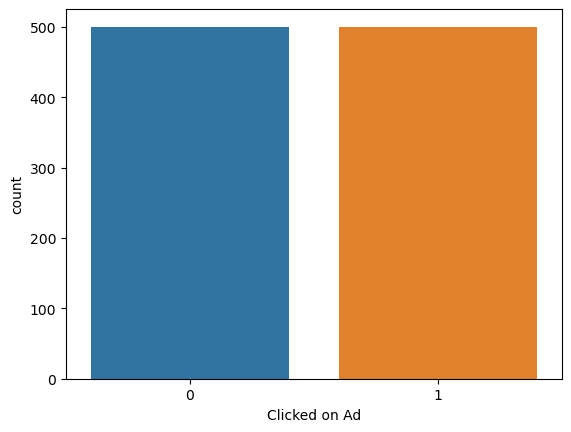

In [209]:
#Visualize
sns.countplot(x="Clicked on Ad",data=data)

In [212]:
x=data[["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage","Male"]]
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.950000,35,61833.90,256.09,0.0
1,80.230000,31,68441.85,193.77,1.0
2,69.470000,26,59785.94,236.50,0.0
3,74.150000,29,54806.18,245.89,1.0
4,68.370000,35,73889.99,225.58,0.0
...,...,...,...,...,...
995,72.970000,30,71384.57,208.58,1.0
996,51.300000,45,67782.17,134.42,1.0
997,64.929524,51,42415.72,120.37,1.0
998,55.550000,19,41920.79,187.95,0.0


In [215]:
x.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        3
dtype: int64

In [217]:
x.Male.value_counts()

Male
0.0    518
1.0    479
Name: count, dtype: int64

In [213]:
#Target
y=data["Clicked on Ad"]
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [214]:
#Split the dataset into train and test
x_train,y_train,x_test,y_text=train_test_split(x, y, test_size=0.3, random_state=1)
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(data["City"].duplicated())

In [ ]:
sns.barplot("City")